In [1]:
import sys

sys.path.append("../")


In [2]:
import json
from datetime import datetime
from pathlib import Path

import numpy as np

from src.trial import Trial, load_trials
from src.wrappers import SetUpstreamSteererAtStep


# Notebook for Shift with Chenran

Shift on 28 and 29 September 2022 for testing Bayesian Optimisation (BO) against Reinforcement Learning (RL).

Once we know BO is working in the machine, the plan is to test BO and RL in pairs on the same problems (targets) and compare their performance in the real world.


In [3]:
# Define target (and thresholds) ... max steps is chosen seperately for each algorithm
# comment = "test"

# target_mu_x = 0.0
# target_sigma_x = 0.0
# target_mu_y = 0.0
# target_sigma_y = 0.0

# target_mu_x_threshold = 3.3198e-6
# target_mu_y_threshold = 3.3198e-6
# target_sigma_x_threshold = 3.3198e-6
# target_sigma_y_threshold = 3.3198e-6


In [4]:
# # Load problem
trial_index = 33

trials = load_trials(Path("../data/trials.yaml"))

comment = f"trial_{trial_index:03d}"

# Note that the indicies are still according to the old order mu_x, mu_y, sigma_x, sigma_y
target_mu_x = trials[trial_index].target_beam[0]
target_sigma_x = trials[trial_index].target_beam[1]
target_mu_y = trials[trial_index].target_beam[2]
target_sigma_y = trials[trial_index].target_beam[3]
target_mu_x_threshold = 3.3198e-9
target_mu_y_threshold = 3.3198e-9
target_sigma_x_threshold = 3.3198e-9
target_sigma_y_threshold = 3.3198e-9


In [5]:
# from src.environments import ea

# env = ea.TransverseTuning(
#     backend="doocs",
#     magnet_init_mode="constant",
#     magnet_init_values=np.zeros(5),
# )
# env.reset()


In [6]:
# # Bayesian Optimisation
# from src.ea_bo import optimize

# optimize(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=75,
#     model_name="Bayesian Optimisation",
#     logbook=True,
#     # data_log_dir=f"data/bo_vs_rl/real/bo/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="EI",
#     init_samples=5,
#     filter_action=None,
#     magnet_init_values=np.array([10, -10, 0, 10, 0]),
# )


In [7]:
from src.environments import ea

env = ea.TransverseTuning(backend="doocs_dummy", magnet_init_mode=np.zeros(5))
_, _ = env.reset()


/opt/homebrew/Caskroom/miniforge/base/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:297: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 10/10 [01:10<00:00,  7.01s/it]

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2023-08-04 17:45:36.969418\nTime taken: 0:01:08.428690\nNo. of steps: 11\n\nBeam before:\n    mu_x    = -0.0018 mm\n    sigma_x =  3.6874 mm\n    mu_y    =  0.0013 mm\n    sigma_y =  2.1648 mm\n\nBeam after:\n    mu_x    = -0.0018 mm\n    sigma_x =  3.6874 mm\n    mu_y    =  0.0013 mm\n    sigma_y =  2.1648 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  1.0967 mm\n    |delta_sigma_x| =  3.4595 mm\n    |delta_mu_y|    =  1.9146 mm\n    |delta_sigma_y| =  1.9681 mm\n\n    MAE =  2.1097 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  39.9953 1/m^2\n    AREAMQZM2 strength = -40.0000 1/m^2\n    AREAMCVM1 kick     

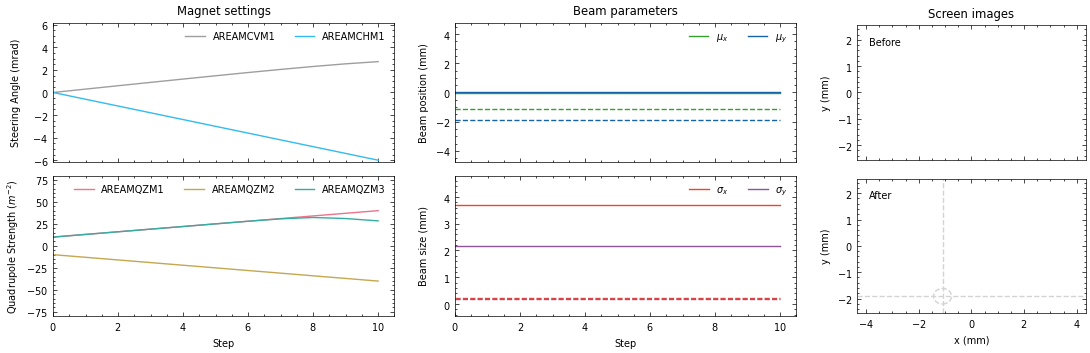

In [8]:
# Reinforcement Learning
from src.ea_optimize import optimize_donkey

optimize_donkey(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=10,
    agent_name="polished-donkey-996",
    logbook=True,
    # data_log_dir=f"data/bo_vs_rl/real/rl/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
)


In [9]:
# from ea_optimize import ARESEADOOCS

# env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
# env.reset()


In [10]:
# # Bayesian Optimisation
# from ea_bo import optimize

# optimize(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=75,
#     model_name="Bayesian Optimisation",
#     logbook=True,
#     data_log_dir=f"data/bo_vs_rl/real/bo_ucb/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="UCB",
#     init_x=None,
#     init_samples=5,
#     filter_action=None,
#     magnet_init_values=np.array([10, -10, 0, 10, 0]),
# )


In [11]:
# from ea_optimize import ARESEADOOCS

# env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
# env.reset()


In [12]:
# Reinforcement Learning with BO takeover
# from ea_rlbo import optimize_donkey_bo_combo

# bo_takeover = 0.00015

# optimize_donkey_bo_combo(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=50,
#     model_name="polished-donkey-996",
#     logbook=True,
#     data_log_dir=f"data/bo_vs_rl/real/rl_bo_takeover_{bo_takeover}/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="UCB",
#     rl_steps=10,
#     bo_takeover=bo_takeover,
#     beta=0.01,
#     stepsize=0.05,
# )
